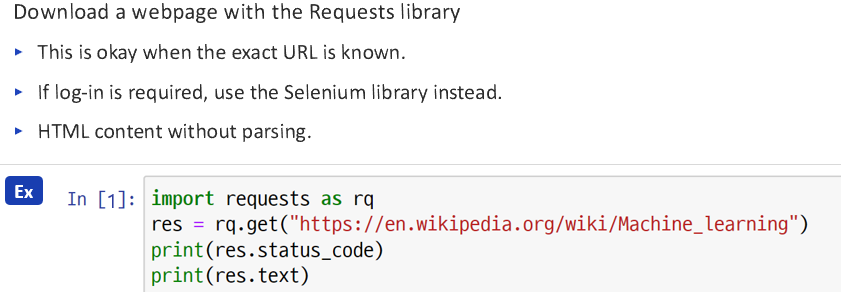

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Cargar el dataset
df = pd.read_csv('C:/4_F5/019_NPL/Detector_de_odio_G1/youtoxic_english_1000.csv', sep=',')

In [7]:
#from pandas_profiling import ProfileReport
#from ydata_profiling import ProfileReport #para Python 3.12

In [8]:
# Generar un reporte

""" profile_hate= ProfileReport(df,title="Reporte Exploratorio")
ruta="C:/4_F5/019_NPL/Detector_de_odio_G1/"
profile_hate.to_file(ruta+"reporte_hate.html") """

' profile_hate= ProfileReport(df,title="Reporte Exploratorio")\nruta="C:/4_F5/019_NPL/Detector_de_odio_G1/"\nprofile_hate.to_file(ruta+"reporte_hate.html") '

In [9]:
# Obtener información general sobre el conjunto de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB
None


In [10]:
print(df.head())

              CommentId      VideoId  \
0  Ugg2KwwX0V8-aXgCoAEC  04kJtp6pVXI   
1  Ugg2s5AzSPioEXgCoAEC  04kJtp6pVXI   
2  Ugg3dWTOxryFfHgCoAEC  04kJtp6pVXI   
3  Ugg7Gd006w1MPngCoAEC  04kJtp6pVXI   
4  Ugg8FfTbbNF8IngCoAEC  04kJtp6pVXI   

                                                Text  IsToxic  IsAbusive  \
0  If only people would just take a step back and...    False      False   
1  Law enforcement is not trained to shoot to app...     True       True   
2  \nDont you reckon them 'black lives matter' ba...     True       True   
3  There are a very large number of people who do...    False      False   
4  The Arab dude is absolutely right, he should h...    False      False   

   IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  IsNationalist  \
0     False          False      False         False     False          False   
1     False          False      False         False     False          False   
2     False          False       True         False     False 

In [11]:
# Verificar la distribución de las etiquetas
print(df.sum())

CommentId          Ugg2KwwX0V8-aXgCoAECUgg2s5AzSPioEXgCoAECUgg3dW...
VideoId            04kJtp6pVXI04kJtp6pVXI04kJtp6pVXI04kJtp6pVXI04...
Text               If only people would just take a step back and...
IsToxic                                                          462
IsAbusive                                                        353
IsThreat                                                          21
IsProvocative                                                    161
IsObscene                                                        100
IsHatespeech                                                     138
IsRacist                                                         125
IsNationalist                                                      8
IsSexist                                                           1
IsHomophobic                                                       0
IsReligiousHate                                                   12
IsRadicalism                      

In [12]:
# Analizar valores faltantes
print("Cantidad de valores faltantes por columna:")
print(df.isnull().sum())

Cantidad de valores faltantes por columna:
CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64


In [13]:
# Calcular el porcentaje de valores faltantes por columna
print("\nPorcentaje de valores faltantes por columna:")
print((df.isnull().sum() / len(df) * 100).round(2))


Porcentaje de valores faltantes por columna:
CommentId          0.0
VideoId            0.0
Text               0.0
IsToxic            0.0
IsAbusive          0.0
IsThreat           0.0
IsProvocative      0.0
IsObscene          0.0
IsHatespeech       0.0
IsRacist           0.0
IsNationalist      0.0
IsSexist           0.0
IsHomophobic       0.0
IsReligiousHate    0.0
IsRadicalism       0.0
dtype: float64


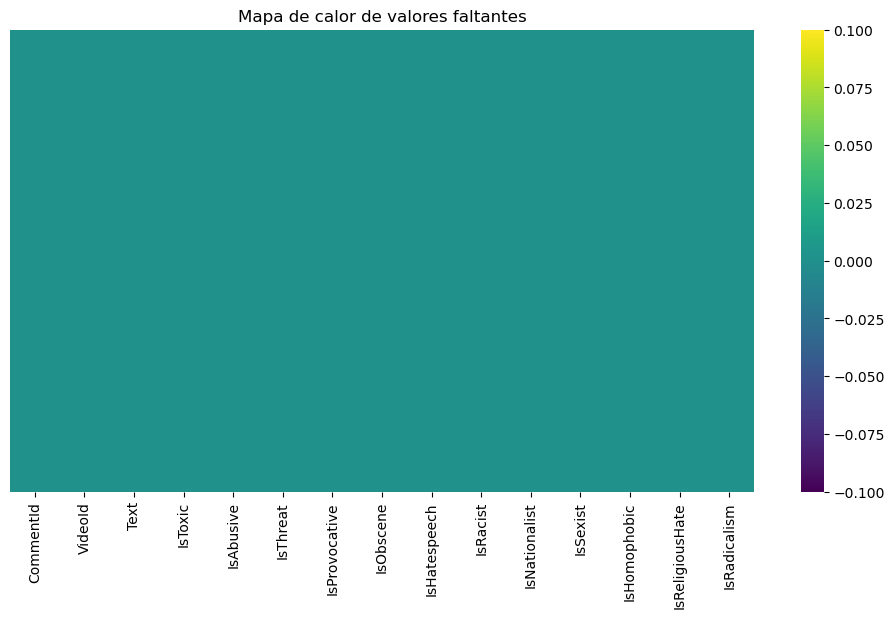

In [14]:
# Visualizar valores faltantes
#using a Jupyter Notebook to enable inline plotting needs this--> %matplotlib inline 
%matplotlib inline 
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Mapa de calor de valores faltantes')
plt.show()

### Eliminar filas con valores faltantes

In [15]:
# Eliminar filas que tienen todos los valores faltantes
df_cleaned = df.dropna(how='all')

In [16]:
# Ver las filas que tienen valores faltantes
print("Filas con valores faltantes:")
print(df[df.isnull().any(axis=1)])

Filas con valores faltantes:
Empty DataFrame
Columns: [CommentId, VideoId, Text, IsToxic, IsAbusive, IsThreat, IsProvocative, IsObscene, IsHatespeech, IsRacist, IsNationalist, IsSexist, IsHomophobic, IsReligiousHate, IsRadicalism]
Index: []


In [17]:
# Registrar información sobre los datos eliminados
total_rows = len(df)
rows_after_cleaning = len(df_cleaned)
removed_rows = total_rows - rows_after_cleaning

print(f"Filas originales: {total_rows}")
print(f"Filas después de la limpieza: {rows_after_cleaning}")
print(f"Filas eliminadas: {removed_rows}")
print(f"Porcentaje de datos conservados: {(rows_after_cleaning/total_rows*100):.2f}%")

Filas originales: 1000
Filas después de la limpieza: 1000
Filas eliminadas: 0
Porcentaje de datos conservados: 100.00%


In [18]:
rows_hate = df[df['IsHatespeech'] == True]
print(rows_hate)

                CommentId      VideoId  \
5    Ugg9a6FtoXdxmXgCoAEC  04kJtp6pVXI   
6    Ugga9KzkNDGvlXgCoAEC  04kJtp6pVXI   
7    UggBlIXoph7p-3gCoAEC  04kJtp6pVXI   
13   UggMY2Oggks5LngCoAEC  04kJtp6pVXI   
15   UggPT9Z38D5yt3gCoAEC  04kJtp6pVXI   
..                    ...          ...   
967  UgjhnVoNm4rcbngCoAEC  TZxEyoplYbI   
970  UgjIY-px1iXxtngCoAEC  TZxEyoplYbI   
976  UgjTW65H46WOzngCoAEC  TZxEyoplYbI   
993  UghGyVemEvDEqXgCoAEC  XRuCW80L9mA   
996  Ugifh2DMhBbDkHgCoAEC  XRuCW80L9mA   

                                                  Text  IsToxic  IsAbusive  \
5    here people his facebook is https://www.facebo...     True      False   
6    Check out this you tube post. "Black man goes ...     True      False   
7    I would LOVE to see this pussy go to Staten Is...     True       True   
13   We all know with the chimpers there is no comp...     True      False   
15            Bassem Masri is a terrorist part of isis     True      False   
..                         

In [19]:
# Limpiar la columna 'Text'
df_cleaned['Text'] = df_cleaned['Text'].str.replace(r'\s*\n\s*', ' ', regex=True)  # Reemplaza saltos de línea por un espacio
df_cleaned['Text'] = df_cleaned['Text'].str.strip()  # Elimina espacios al inicio y al final


In [20]:
print(df['IsHatespeech'].unique())

[False  True]


### Eliminar ID IDvideo (machaco la variable df_cleaned)

In [ ]:
# Eliminar la columna 'id' del DataFrame
df_cleaned = df_cleaned.drop(columns=['CommentId', 'VideoId'], axis=1)

KeyError: "['CommentId', 'VideoId'] not found in axis"

In [55]:
print(df_cleaned.head())

                                                Text  IsToxic  IsAbusive  \
0  If only people would just take a step back and...        0          0   
1  Law enforcement is not trained to shoot to app...        1          1   
2  Dont you reckon them 'black lives matter' bann...        1          1   
3  There are a very large number of people who do...        0          0   
4  The Arab dude is absolutely right, he should h...        0          0   

   IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  IsNationalist  \
0         0              0          0             0         0              0   
1         0              0          0             0         0              0   
2         0              0          1             0         0              0   
3         0              0          0             0         0              0   
4         0              0          0             0         0              0   

   IsSexist  IsHomophobic  IsReligiousHate  IsRadicalism  
0  

In [56]:
print(df_cleaned.tail())

                                                  Text  IsToxic  IsAbusive  \
995  I remember that they sent in the national defe...        0          0   
996  Stats don`t represent the problem. Race baitin...        1          0   
997  The quote from the mother... Wow that hit hard...        0          0   
998                            this video is so racist        0          0   
999       God, the narrator has such an annoying lisp.        0          0   

     IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
995         0              0          0             0         0   
996         0              0          0             1         1   
997         0              0          0             0         0   
998         0              0          0             0         0   
999         0              0          0             0         0   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate  IsRadicalism  
995              0         0             0          

In [58]:
df_cleaned.to_csv('df_cleaned.csv',sep=';')

### Convertir las etiquetas a valores binarios (0 para falso, 1 para verdadero)

In [22]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Aplicar el LabelEncoder a las columnas especificadas
for col in ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 
             'IsObscene', 'IsHatespeech', 'IsRacist', 
             'IsNationalist', 'IsSexist', 'IsHomophobic', 
             'IsReligiousHate', 'IsRadicalism']:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [23]:
print(df_cleaned)

                                                  Text  IsToxic  IsAbusive  \
0    If only people would just take a step back and...        0          0   
1    Law enforcement is not trained to shoot to app...        1          1   
2    Dont you reckon them 'black lives matter' bann...        1          1   
3    There are a very large number of people who do...        0          0   
4    The Arab dude is absolutely right, he should h...        0          0   
..                                                 ...      ...        ...   
995  I remember that they sent in the national defe...        0          0   
996  Stats don`t represent the problem. Race baitin...        1          0   
997  The quote from the mother... Wow that hit hard...        0          0   
998                            this video is so racist        0          0   
999       God, the narrator has such an annoying lisp.        0          0   

     IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist

In [24]:
print(df_cleaned[df_cleaned['IsHatespeech']==True])
rows_hate=df_cleaned[df_cleaned['IsHatespeech']==True]

rows_hate.to_csv('rows_hate.csv', index=False, sep=';',encoding='utf-8')

                                                  Text  IsToxic  IsAbusive  \
5    here people his facebook is https://www.facebo...        1          0   
6    Check out this you tube post. "Black man goes ...        1          0   
7    I would LOVE to see this pussy go to Staten Is...        1          1   
13   We all know with the chimpers there is no comp...        1          0   
15            Bassem Masri is a terrorist part of isis        1          0   
..                                                 ...      ...        ...   
967                                Lol stupid mooslims        1          0   
970  "back to Africa" still a thing?  cause they se...        1          0   
976  I dont understand why the black community want...        1          1   
993  Whites should move-out of Ferguson, let's see ...        1          0   
996  Stats don`t represent the problem. Race baitin...        1          0   

     IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist

### Dividir en X e y

In [25]:
# Dividir en X e y
X = df_cleaned.drop('IsHatespeech', axis=1)  # Reemplaza 'tu_columna_objetivo' con el nombre de tu variable dependiente
y = df_cleaned['IsHatespeech']


In [26]:
# Dividir en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Voy a separar unos 10 registros para hacer una prueba luego.(e.g., 10 samples)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10, random_state=42)

### Creación del Modelo

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

#### Vectorizar el texto usando TF-IDF

In [29]:
# Vectorizar el texto usando TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Text'])
X_test_vectorized = vectorizer.transform(X_test['Text'])

In [30]:
""" from sklearn.feature_extraction.text import CountVectorizer

# Suponiendo que 'text_column' es la columna que deseas vectorizar
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['Text'])  # Asegúrate de que 'text_column' sea la columna correcta """

" from sklearn.feature_extraction.text import CountVectorizer\n\n# Suponiendo que 'text_column' es la columna que deseas vectorizar\nvectorizer = CountVectorizer()\nX_train_vectorized = vectorizer.fit_transform(X_train['Text'])  # Asegúrate de que 'text_column' sea la columna correcta "

In [31]:
print("Forma de X_train_vectorized:", X_train_vectorized.shape)
print("Forma de y_train:", y_train.shape)

Forma de X_train_vectorized: (790, 4012)
Forma de y_train: (790,)


Se utiliza TfidfVectorizer para convertir el texto en una representación numérica que puede ser utilizada por el modelo de aprendizaje automático.

· fit_transform(X_train) ajusta el vectorizador a los datos de entrenamiento y transforma el texto en una matriz de características TF-IDF (Term Frequency-Inverse Document Frequency).

· transform(X_test) aplica la misma transformación a los datos de prueba, utilizando el mismo ajuste que se realizó en el conjunto de entrenamiento.

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Aplicar SMOTE para aumentar la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vectorized, y_train)

# Verificar la nueva distribución
from collections import Counter
print("Distribución original:", Counter(y_train))
print("Distribución después de SMOTE:", Counter(y_train_resampled))

Distribución original: Counter({0: 689, 1: 101})
Distribución después de SMOTE: Counter({0: 689, 1: 689})


####  Entrenar un modelo de regresión logística

In [33]:
model = LogisticRegression(class_weight='balanced',penalty='l2', C=0.1, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42)

In [34]:
# Realizar predicciones
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test_vectorized)

In [35]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluar el rendimiento
print("Rendimiento en el conjunto de entrenamiento:")
print(classification_report(y_train_resampled, y_train_pred))
print("Precisión en el conjunto de entrenamiento:", accuracy_score(y_train_resampled, y_train_pred))


Rendimiento en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       689
           1       0.93      0.88      0.90       689

    accuracy                           0.91      1378
   macro avg       0.91      0.91      0.91      1378
weighted avg       0.91      0.91      0.91      1378

Precisión en el conjunto de entrenamiento: 0.9071117561683599


In [36]:
print("\nRendimiento en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_test_pred))


Rendimiento en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       165
           1       0.50      0.43      0.46        35

    accuracy                           0.82       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.82      0.82      0.82       200

Precisión en el conjunto de prueba: 0.825


In [37]:
print(accuracy_score(y_train_resampled, y_train_pred)-accuracy_score(y_test, y_test_pred))

0.08211175616835997


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_test_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[150  15]
 [ 20  15]]


#### Entrenar Modelo con XGBoost

In [39]:
from xgboost import XGBClassifier

# Ajustar scale_pos_weight para equilibrar el modelo
model_xg = XGBClassifier(scale_pos_weight=(len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])))
model_xg.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [40]:
# Realizar predicciones
y_train_pred_xg= model_xg.predict(X_train_resampled)
y_test_pred_xg= model_xg.predict(X_test_vectorized)

In [41]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluar el rendimiento
print("Rendimiento en el conjunto de entrenamiento en XG:")
print(classification_report(y_train_resampled, y_train_pred_xg))
print("Precisión en el conjunto de entrenamiento XG:", accuracy_score(y_train_resampled, y_train_pred_xg))

Rendimiento en el conjunto de entrenamiento en XG:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       689
           1       1.00      0.99      1.00       689

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378

Precisión en el conjunto de entrenamiento XG: 0.9970972423802612


In [42]:
print("\nRendimiento en el conjunto de prueba de XG:")
print(classification_report(y_test, y_test_pred_xg))
print("Precisión en el conjunto de prueba de XG:", accuracy_score(y_test, y_test_pred_xg))


Rendimiento en el conjunto de prueba de XG:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       165
           1       0.83      0.29      0.43        35

    accuracy                           0.86       200
   macro avg       0.85      0.64      0.67       200
weighted avg       0.86      0.86      0.84       200

Precisión en el conjunto de prueba de XG: 0.865


In [43]:
print(accuracy_score(y_train_resampled, y_train_pred_xg)-accuracy_score(y_test, y_test_pred_xg))

0.13209724238026122


In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_test_pred_xg)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[163   2]
 [ 25  10]]


#### Modelo Random Classifier

In [45]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
model_rcf=rfc.fit(X_train_resampled, y_train_resampled)

# predict
y_train_pred_rfc= model_rcf.predict(X_train_resampled)
y_test_pred_rfc= model_rcf.predict(X_test_vectorized)



In [46]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluar el rendimiento
print("Rendimiento en el conjunto de entrenamiento en Random Classifier:")
print(classification_report(y_train_resampled, y_train_pred_rfc))
print("Precisión en el conjunto de entrenamiento Random Classifier:", accuracy_score(y_train_resampled, y_train_pred_rfc))

Rendimiento en el conjunto de entrenamiento en Random Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       689
           1       1.00      1.00      1.00       689

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378

Precisión en el conjunto de entrenamiento Random Classifier: 1.0


In [47]:
print("\nRendimiento en el conjunto de prueba de Random Classifier:")
print(classification_report(y_test, y_test_pred_rfc))
print("Precisión en el conjunto de prueba de Random Classifer:", accuracy_score(y_test, y_test_pred_xg))


Rendimiento en el conjunto de prueba de Random Classifier:
              precision    recall  f1-score   support

           0       0.83      0.99      0.91       165
           1       0.67      0.06      0.11        35

    accuracy                           0.83       200
   macro avg       0.75      0.53      0.51       200
weighted avg       0.80      0.83      0.77       200

Precisión en el conjunto de prueba de Random Classifer: 0.865


In [48]:
print(accuracy_score(y_train_resampled, y_train_pred_rfc)-accuracy_score(y_test, y_test_pred_rfc))

0.17000000000000004


#### Guardar el entrenamiento del modelo y el vectorizador

In [49]:
# Guardar el modelo en un archivo
import pickle
with open('modelo_regLog.pkl', 'wb') as archivo:
    pickle.dump(model, archivo)

In [50]:
# Guardar el vectorizador en un archivo
with open('vectorizer.pkl', 'wb') as archivo:
    pickle.dump(vectorizer, archivo)

#### Cargar el entrenamiento del modelo y el vectorizador

In [51]:
#Es para cargar el modelo

import pickle

# Cargar el modelo y el vectorizador entrenados
with open('modelo_regLog.pkl', 'rb') as f:
    model = pickle.load(f)
    
with open('vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

In [52]:
print(X_val)

                                                  Text  IsToxic  IsAbusive  \
726  Huge wisdom here for anyone that has ears to l...        0          0   
138  If that cop shot a white guy, there would not ...        0          0   
266  I wonder how big of a crater Thug Brown made i...        1          1   
765  Im a white person who always thought everyone ...        1          0   
798  You see if Blacks speak  the truth and don't c...        0          0   
742  Oh that politicians had the same style of orat...        0          0   
512  When did coming towards the officer is the sam...        0          0   
746  Thanks for being a voice of sanity in the blac...        0          0   
474    this dude is lying his azz off... racist cracka        1          1   
579  The protesters look like kids (16-22?)   I won...        0          0   

     IsThreat  IsProvocative  IsObscene  IsRacist  IsNationalist  IsSexist  \
726         0              0          0         0              

In [53]:
# Función para clasificar un mensaje
def classify_message(text):
    # Transformar el texto en un vector de características
    X = vectorizer.transform([text])
    # Realizar la predicción utilizando el modelo entrenado
    y_pred = model.predict(X)[0]
    # Devolver el resultado de la clasificación
    return bool(y_pred)

# Iterar a través de los mensajes de validación
for i, message in enumerate(X_val['Text']):
    # Clasificar el mensaje y mostrar el resultado
    if classify_message(message)==1:
        print(f"Los mensajes calificados como Hate son:\n'{message}'.\n\n")
    else:
        print(f"\nLos mensajes 'normales' son:\n'{message}'.")


Los mensajes 'normales' son:
'Huge wisdom here for anyone that has ears to listen.'.
Los mensajes calificados como Hate son:
'If that cop shot a white guy, there would not be any riots. But since he shot a black guy, everyone seems to think it was because he was black. Look at the evidence not skin color. Everyone always throws out the race card over crap like this.'.


Los mensajes calificados como Hate son:
'I wonder how big of a crater Thug Brown made in the street when he met the final shot to the melon. You get what you sew... BLM - When Truth and Facts Don't then they Shit in their own Kitchens before they get the right directions to the toilet.'.


Los mensajes calificados como Hate son:
'Im a white person who always thought everyone should be treated fairly. With BLM and creating a bunch of bull and threatening my life and others by making it harder for cops to take out the bad guys, maybe not drawing their weapon fast enough or killing the spirit of being a hero or killing th